## breast cancer using CNN

In [0]:
pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 40kB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
     |████████████████████████████████| 450kB 56.5MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exis

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__) 

1.15.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df.shape

(569, 30)

In [0]:
x = cancer.data
y = cancer.target

In [0]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [0]:
x_train.shape

(455, 30)

In [0]:
x_test.shape

(114, 30)

#### applying standard scaler

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
x_train.shape

(455, 30)

In [0]:
x_test.shape

(114, 30)

In [0]:
# converting 2-d data to 3-d data
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

In [0]:
#from tensorflow.keras import Sequential

In [0]:
model = Sequential()
model.add(Conv1D(filters = 32,kernel_size=2,activation='relu',input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters = 64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))



In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [0]:
model.compile(optimizer=Adam(lr = 0.00005),loss = 'binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(x_train,y_train,epochs=50,validation_data = (x_test,y_test),verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 0s 641us/sample - loss: 0.0988 - acc: 0.9604 - val_loss: 0.1554 - val_acc: 0.9737
Epoch 2/50
455/455 [==============================] - 0s 346us/sample - loss: 0.0966 - acc: 0.9626 - val_loss: 0.1549 - val_acc: 0.9737
Epoch 3/50
455/455 [==============================] - 0s 340us/sample - loss: 0.0990 - acc: 0.9670 - val_loss: 0.1544 - val_acc: 0.9737
Epoch 4/50
455/455 [==============================] - 0s 373us/sample - loss: 0.0745 - acc: 0.9604 - val_loss: 0.1549 - val_acc: 0.9737
Epoch 5/50
455/455 [==============================] - 0s 338us/sample - loss: 0.0909 - acc: 0.9692 - val_loss: 0.1556 - val_acc: 0.9737
Epoch 6/50
455/455 [==============================] - 0s 356us/sample - loss: 0.0848 - acc: 0.9626 - val_loss: 0.1561 - val_acc: 0.9737
Epoch 7/50
455/455 [==============================] - 0s 362us/sample - loss: 0.1108 - acc: 0.9516 - val_loss: 0.1563 - val_acc: 0.9737
Ep

from above training, using 50 epochs, the training accuracy becomes greater than validation accuracy after 48 epochs. Hence model overfitted after 48 epochs

In [0]:
history.history

{'acc': [0.96043956,
  0.96263736,
  0.96703297,
  0.96043956,
  0.9692308,
  0.96263736,
  0.95164835,
  0.9758242,
  0.9714286,
  0.96263736,
  0.9802198,
  0.9714286,
  0.95384616,
  0.9736264,
  0.96043956,
  0.96483517,
  0.95604396,
  0.96263736,
  0.96483517,
  0.9692308,
  0.9692308,
  0.9692308,
  0.9692308,
  0.96703297,
  0.9802198,
  0.9758242,
  0.96703297,
  0.9736264,
  0.96043956,
  0.95164835,
  0.9714286,
  0.9692308,
  0.9758242,
  0.96483517,
  0.95604396,
  0.96703297,
  0.9758242,
  0.9692308,
  0.96703297,
  0.9736264,
  0.9758242,
  0.9802198,
  0.96703297,
  0.9692308,
  0.96483517,
  0.978022,
  0.9692308,
  0.9846154,
  0.9824176,
  0.9846154],
 'loss': [0.0987838038130776,
  0.09660017312719271,
  0.09897645210008045,
  0.07451769455980796,
  0.09091868530754205,
  0.08483407905141076,
  0.1107972088162429,
  0.06707890620851725,
  0.07712199348178539,
  0.08446516192385128,
  0.05314473791436835,
  0.08367534729314374,
  0.12672658326861622,
  0.06740491804

In [0]:
def plot_curve(history):
  epoch_range =range(1,51)
  plt.plot(epoch_range, history.history['acc'])
  plt.plot(epoch_range, history.history['val_acc'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper right")
  plt.show()

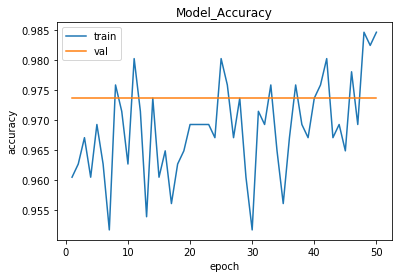

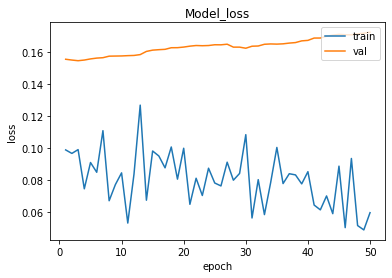

In [0]:
plot_curve(history)

From the above curve, the yellow line represents the validation accuracy and validation loss respectively. similaly, the blue line represents the training 
accuracy and training loss.

from fig 1:-
the blue line sometimes exceeds the yellow line means the model is oerfitting whenever the training acc is greater than validatioin accuracy. In order to be proper the yellow line should always be above than the blue.

from fig 2:- The yellow line should have been below the the blue line meaning that the validation error should be lesser than training error but its not happening in our case.